<a href="https://colab.research.google.com/github/PrasadReddyGaddam/PYTHON/blob/master/Assignment_27(27_06_20).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CSE-221710301019-PRASAD REDDY**

Assignment at [23]

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/claimants.csv")
df

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...,...
1335,34100,1,0.0,1.0,0.0,NaN,0.576
1336,34110,0,1.0,1.0,0.0,46.0,3.705
1337,34113,1,1.0,1.0,0.0,39.0,0.099
1338,34145,0,1.0,0.0,0.0,8.0,3.177


In [3]:
# Drop CASNUM
df.drop(["CASENUM"],axis=1,inplace=True)
df

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...
1335,1,0.0,1.0,0.0,NaN,0.576
1336,0,1.0,1.0,0.0,46.0,3.705
1337,1,1.0,1.0,0.0,39.0,0.099
1338,0,1.0,0.0,0.0,8.0,3.177


In [4]:
df.describe()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
count,1340.000000,1328.000000,1299.000000,1292.000000,1151.000000,1340.000000
mean,0.488806,0.558735,0.907621,0.017028,28.414422,3.806307
std,0.500061,0.496725,0.289671,0.129425,20.304451,10.636903
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,9.000000,0.400000
50%,0.000000,1.000000,1.000000,0.000000,30.000000,1.069500
75%,1.000000,1.000000,1.000000,0.000000,43.000000,3.781500
max,1.000000,1.000000,1.000000,1.000000,95.000000,173.604000


In [5]:
df.isna().sum()

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

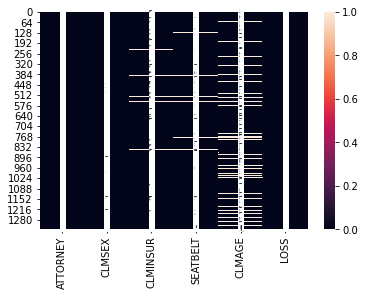

In [6]:
sns.heatmap(df.isna(),annot=True)

In [7]:
# User defined function for imputing null values
def fill(col):
  col.fillna(col.value_counts().index[0],inplace=True)
  return col
df.apply(lambda col:fill(col))
df.isnull().sum()

ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

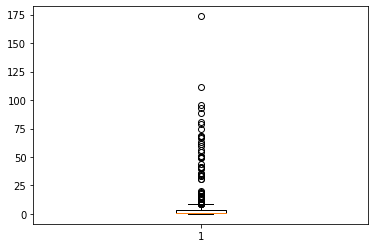

In [8]:
plt.boxplot(df.LOSS)
plt.show()

- Outliers are also imputed as missing values -->Imputation
- Winsorization --> Outliers are replaced with next small value
- Drop outliers or include them

In [9]:
# Spllitting I/O
X = df.iloc[:,1:]
y = df.ATTORNEY

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [11]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()

In [12]:
reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
y_train_pred = reg.predict(X_train)

In [14]:
# Confusion matrix 
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_train,y_train_pred)
conf

array([[315, 170],
       [108, 345]])

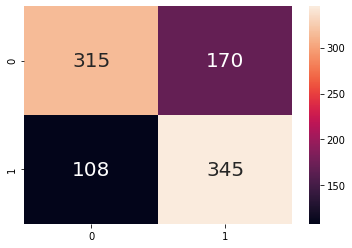

In [15]:
sns.heatmap(conf,annot=True,fmt=".0f",annot_kws={"size":"20"})
plt.show()

In [16]:
# Accuracy  --->  TP+FN/TP+FP+TN+FN
(315+345)/(315+170+108+345)

0.7036247334754797

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_train_pred)

0.7036247334754797

In [18]:
# precicion
conf[0][0]/(conf[0][0]+conf[0][1])

0.6494845360824743

In [19]:
from sklearn.metrics import precision_score
precision_score(y_train,y_train_pred)

0.6699029126213593

In [20]:
# Out of all the actual values ,how many are correctly classified
#Recall
315/(315+108)

0.7446808510638298

In [21]:
from sklearn.metrics import recall_score
recall_score(y_train,y_train_pred)

0.7615894039735099

In [22]:
#calculating f1 score for model
from sklearn.metrics import f1_score
f1_score(y_train,y_train_pred)

0.712809917355372

1.Make predictions on test data and calculate the precision, recall and f1-score

In [23]:
y_test_pred = reg.predict(X_test)

In [24]:
conf = confusion_matrix(y_test,y_test_pred)
conf

array([[120,  80],
       [ 42, 160]])

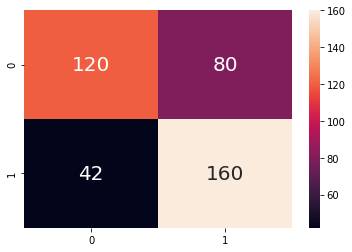

In [25]:
sns.heatmap(conf,annot=True,fmt=".0f",annot_kws={"size":"20"})
plt.show()

In [26]:
# Accuracy  --->  TP+FN/TP+FP+TN+FN
(120+160)/(120+80+42+160)

0.6965174129353234

In [27]:
accuracy_score(y_test,y_test_pred)

0.6965174129353234

In [28]:
# precicion
conf[0][0]/(conf[0][0]+conf[0][1])

0.6

In [29]:
precision_score(y_test,y_test_pred)

0.6666666666666666

In [30]:
#Recall
120/(120+42)

0.7407407407407407

In [31]:
recall_score(y_test,y_test_pred)

0.7920792079207921

In [32]:
f1_score(y_test,y_test_pred)

0.7239819004524886

2. Find the frequency of categories in the CLMSEX column and plot a graph. Write the observations which category people are more.

In [33]:
df["CLMSEX"].value_counts()

1.0    754
0.0    586
Name: CLMSEX, dtype: int64

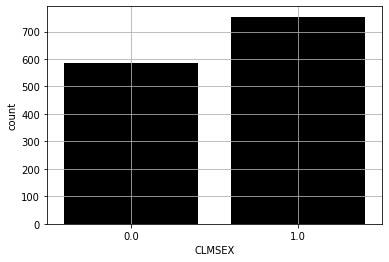

In [34]:
sns.countplot(x = "CLMSEX",data=df,color="black")
plt.grid()
plt.show()
#There are more no of people in category 1

3. Plot the visualizations of the column CLMAGE and find the pattern in the data like which age group people were more as claimants 

(array([295., 401.,  27., 182., 220., 115.,  54.,  28.,  15.,   3.]),
 array([ 0. ,  9.5, 19. , 28.5, 38. , 47.5, 57. , 66.5, 76. , 85.5, 95. ]),
 <a list of 10 Patch objects>)

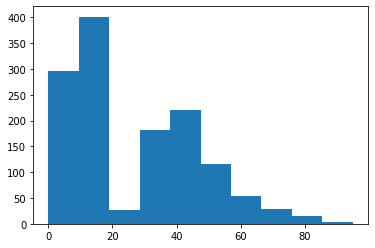

In [35]:
plt.hist(df["CLMAGE"])
# It is observed that more claimants are in age group of(9.5 -19)

4. Plot the visualizations of the column CLMAGE and find the pattern in the data like which age group people were more as claimants 

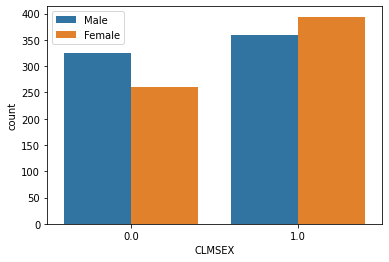

In [36]:
sns.countplot(x="CLMSEX",data=df,hue="ATTORNEY")
plt.legend(labels={"Female","Male"})
plt.show()

In [37]:
#out of female how many will hire an attorney
(df[df.ATTORNEY==1][df.CLMSEX==0]).shape[0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


261

In [38]:
#out of female how many will hire an attorney
(df[df.ATTORNEY==1][df.CLMSEX==1]).shape[0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


394

5. Check the correlation of the dataset and visualize it through heatmap

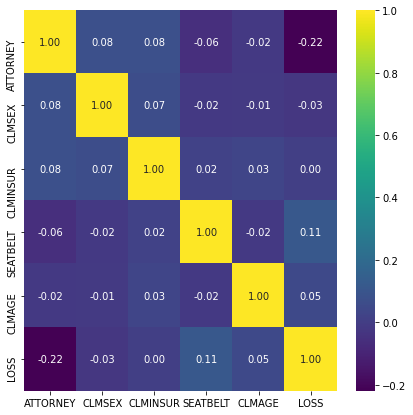

In [39]:
plt.figure(figsize=(7,7))
sns.heatmap(data=df.corr(),annot=True,fmt="0.2f",cmap="viridis")
plt.show()

6. Calculate the number people who did not wear SEATBELT, what is their percentage of hiring attorney 

In [40]:
df.SEATBELT.value_counts()
# It is observed that nearly 1318 people didnot wear seat belt

0.0    1318
1.0      22
Name: SEATBELT, dtype: int64

In [41]:
# calculating no of persons with seatbelts hired attorney
p = df.SEATBELT[df.SEATBELT==1][df.ATTORNEY==1].sum() 
1-(p/df.shape[0]) # substracting from 1 to get no of persons without seatbelts hiring attorney
# It is observed that 0.99 % of persons who did not wear  seatbelt hired attorney

0.9955223880597015